In [36]:
import xgboost as xgb
import os
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [37]:
!ls

agaricus.txt.test  agaricus.txt.train svm.ipynb          xgboost.ipynb


In [38]:
# read in data
dtrain = xgb.DMatrix('agaricus.txt.train')
dtest = xgb.DMatrix('agaricus.txt.test')

# inspect data
print 'Training data is {} by {}'.format(dtrain.num_row(), dtrain.num_col())
print 'Testing data is {} by {}'.format(dtest.num_row(), dtest.num_col())

print 'Training data class 1 count {0}, {1:.2f}% of total' \
    .format(dtrain.get_label().sum(), dtrain.get_label().sum()*100/dtrain.num_row())
print 'Testing data class 1 count {0}, {1:.2f}% of total' \
    .format(dtest.get_label().sum(), dtest.get_label().sum()*100/dtest.num_row())

Training data is 6513 by 127
Testing data is 1611 by 127
Training data class 1 count 3140.0, 48.21% of total
Testing data class 1 count 776.0, 48.17% of total


In [39]:
# specify parameters via map
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)

# make prediction
preds = bst.predict(dtest)

# check predictions
print 'Prediction', preds

Prediction [0.28583017 0.9239239  0.28583017 ... 0.9239239  0.05169873 0.9239239 ]


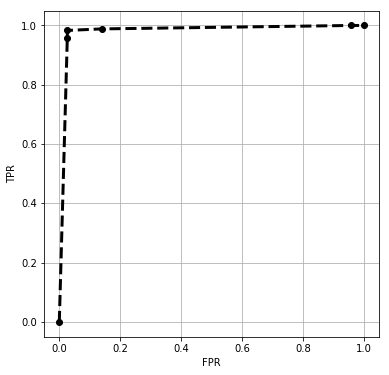

In [47]:
fpr, tpr, thresholds = roc_curve(dtest.get_label(), preds)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, 'ko--', linewidth=4, markersize=)
plt.xlabel('FPR'); plt.ylabel('TPR')
plt.grid()
plt.show()